In [6]:
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(StringIO("""
Beehive StatesF0	Beehive StatesF1	Beehive	Beijing Opera Percussion	CREMA-D	DCASE16	ESC-50	FSD50K	GTZAN Genre	GTZAN Music Speech	Gunshot Triangulation	LibriCount	MAESTRO 5hr	Mridangam Stroke	Mridangam Tonic	NSynth Pitch 50hr	NSynth Pitch 5hr	Speech Commands 5hr	Speech Commands Full	Vocal Imitations	VoxLingua107 Top10
Dasheng-1.2B	37.12	71.66	54.39	96.18	81.58	94.22	85.25	54.22	88.8	97.69	99.11	79.56	43.31	96.78	96.13	85.57	74.4	97.1	97.91	19.38	78.71
CED-Base	46.18	50.53	48.355	96.6	69.1	92.19	96.65	65.48	88.6	94.36	89.29	67.85	14.76	97.43	96.55	82.81	68.2	86.93	89.67	22.69	38.57
Whisper-base	54.61	59.33	56.97	94.47	71.34	9.22	77.1	43.1	81	95.26	80.36	63.92	0	96.5	89.49	59.26	36.8	96.79	97.91	19.72	88.68
AudioMAE	63.19	52.22	57.705	96.17	68.28	70.77	73.2	39.29	74.3	90.51	63.39	58.9	0.14	87.29	83.78	81.72	67.4	24.68	29.61	16.02	34.57
Wav2Vec2	0	0	0	90.67	65.62	66.3	56.1	34.17	78	94.62	84.82	69.21	3.29	94.32	82.83	65.3	40.2	83.82	87.85	8.006	49.28
""")
                 ,sep='\t')

df['Beehive'] = (df['Beehive StatesF0'] + df['Beehive StatesF1']) /2
del df['Beehive StatesF0'] 
del df['Beehive StatesF1']
del df['Beehive']
metrics = df.columns.tolist()

df = df.reset_index().rename({'index':'Model'}, axis=1)
df

Model  Beijing Opera Percussion  CREMA-D  DCASE16  ESC-50  FSD50K  \
0  Dasheng-1.2B                     96.18    81.58    94.22   85.25   54.22   
1      CED-Base                     96.60    69.10    92.19   96.65   65.48   
2  Whisper-base                     94.47    71.34     9.22   77.10   43.10   
3      AudioMAE                     96.17    68.28    70.77   73.20   39.29   
4      Wav2Vec2                     90.67    65.62    66.30   56.10   34.17   

   GTZAN Genre  GTZAN Music Speech  Gunshot Triangulation  LibriCount  \
0         88.8               97.69                  99.11       79.56   
1         88.6               94.36                  89.29       67.85   
2         81.0               95.26                  80.36       63.92   
3         74.3               90.51                  63.39       58.90   
4         78.0               94.62                  84.82       69.21   

   MAESTRO 5hr  Mridangam Stroke  Mridangam Tonic  NSynth Pitch 50hr  \
0        43.31             96.78            96.13              85.57   
1        14.76             97.43            96.55              82.81   
2         0.00             96.50            89.49              59.26   
3         0.14             87.29            83.78              81.72   
4         3.29             94.32            82.83              65.30   

   NSynth Pitch 5hr  Speech Commands 5hr  Speech Commands Full  \
0              74.4                97.10                 97.91   
1              68.2                86.93                 89.67   
2              36.8                96.79                 97.91   
3              67.4                24.68                 29.61   
4              40.2                83.82                 87.85   

   Vocal Imitations  VoxLingua107 Top10  
0            19.380               78.71  
1            22.690               38.57  
2            19.720               88.68  
3            16.020               34.57  
4             8.006               49.28

(0.0, 126.80560678716341)
(0.0, 126.80560678716341)
(0.0, 126.80560678716341)
(0.0, 126.80560678716341)
(0.0, 126.80560678716341)
(0.0, 126.80560678716341)
(0.0, 126.80560678716341)
(0.0, 126.80560678716341)
(0.0, 126.80560678716341)
(0.0, 126.80560678716341)
(0.0, 126.80560678716341)
(0.0, 126.80560678716341)
(0.0, 126.80560678716341)
(0.0, 126.80560678716341)
(0.0, 126.80560678716341)
(0.0, 126.80560678716341)
(0.0, 126.80560678716341)
(0.0, 126.80560678716341)


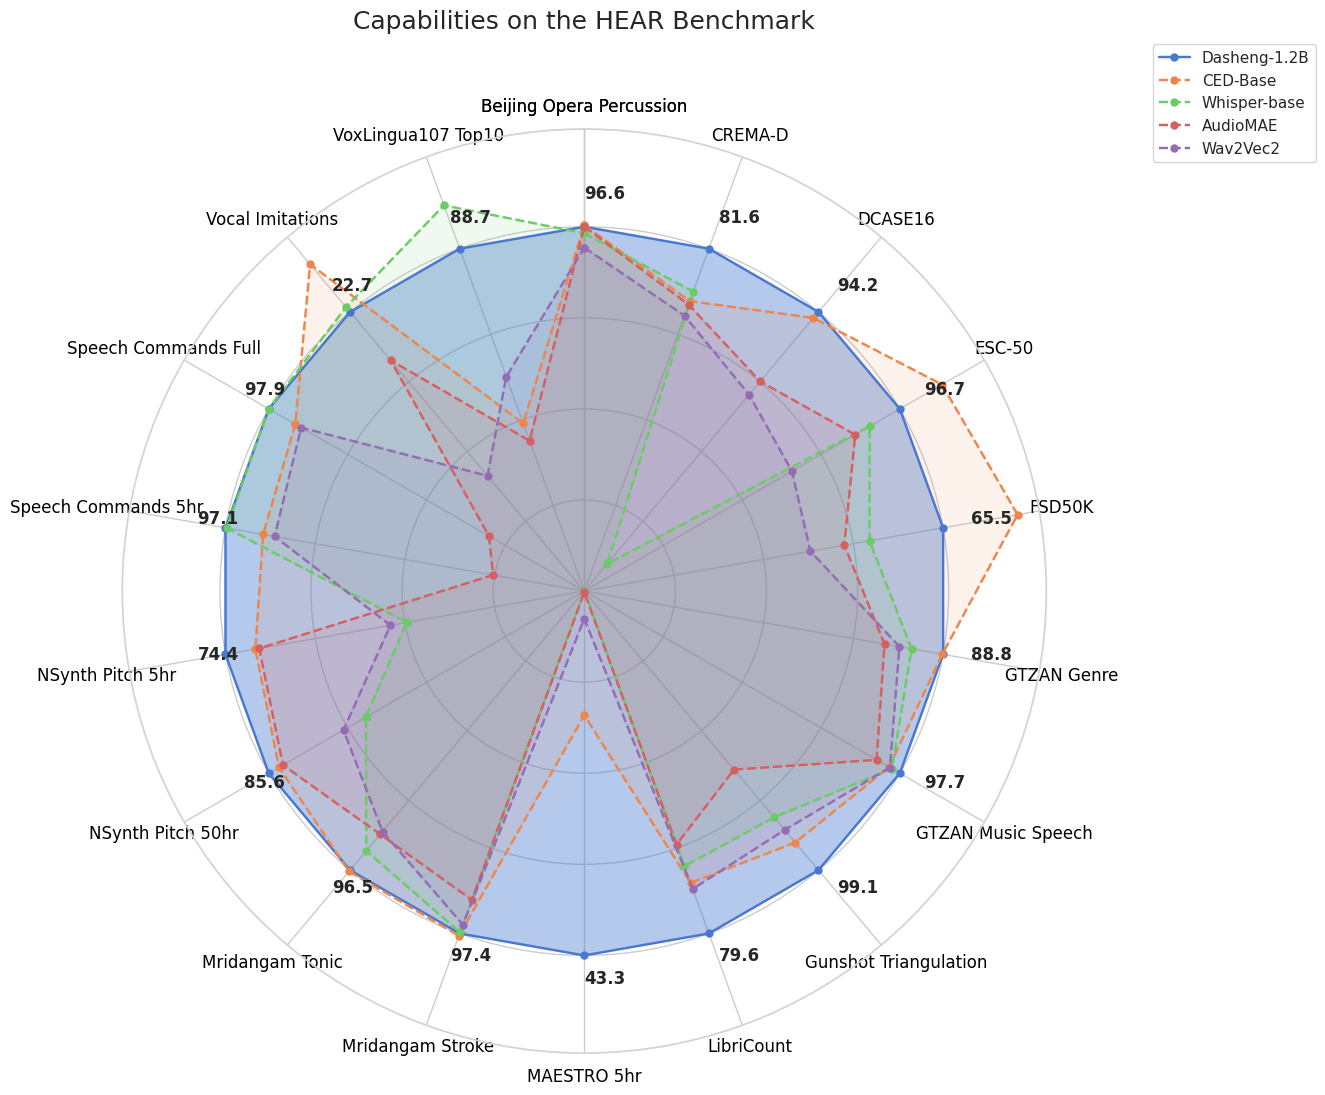

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')

# Function
def plot_radar_chart(data, metrics, title, rescale:bool = False):
    N = len(metrics)
    local_data = data.copy()
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': 'polar'})
    
    ax.set_title(title, y=1.1, fontsize=18)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    ax.spines['polar'].set_zorder(1)
    ax.spines['polar'].set_color('lightgrey')
    
    color_palette = sns.color_palette('muted')
    alpha = [0.4] + [0.1] * (len(data)-1)
    linestyle = ['solid'] + ['dashed'] * (len(data)-1)
    if rescale:
        local_data.loc[:, metrics] = local_data.loc[:,metrics].div(local_data.iloc[0][metrics]) * 100
        
        
    for idx, (i, row) in enumerate(local_data.iterrows()):
        values = row[metrics].values.flatten().tolist()
    
        
        values = values + [values[0]]
        orig_values = data.iloc[i][metrics].values
        ax.plot(theta, values, linewidth=1.75, linestyle=linestyle[i], label=row['Model'], marker='o', markersize=5, color=color_palette[idx % len(color_palette)])
        ax.fill(theta, values, alpha=alpha[i], color=color_palette[idx % len(color_palette)])

    max_vals = local_data[metrics].max().to_list()
    max_vals_orig = data[metrics].max().to_list()
    for i in range(len(theta)-1):
        t = theta[i] 
        print(ax.get_ylim())
        # v = max_vals[i] - max_vals[i] * 0.07
        display_v = max_vals_orig[i]
        # plt.text(t, v, f"{display_v:.1f}",fontweight='bold')
        plt.text(t, ax.get_ylim()[-1] * 0.85, f"{display_v:.1f}",fontweight='bold')
    
    plt.yticks([0, 25, 50, 75, 100], ["", "", "", "", ""], color="black", size=12)
    plt.xticks(theta, metrics + [metrics[0]], color='black', size=12)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1)) 
    
    return fig
fig = plot_radar_chart(df, metrics, title="Capabilities on the HEAR Benchmark",rescale=True)
plt.savefig('hear_capabilities.pdf', bbox_inches='tight')